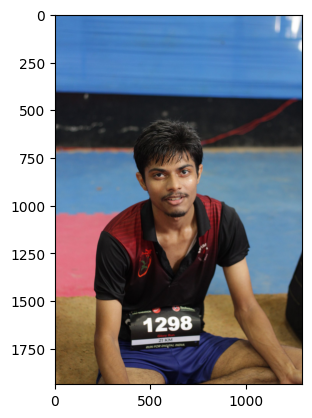

In [1]:
from keras_facenet import FaceNet
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

detector = FaceNet()

path_to_file = "/Users/arpitsharma/Downloads/hell_race/half-marathon2.jpg"
img = cv2.cvtColor(cv2.imread(path_to_file), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [2]:
detections, face_crops = detector.crop(img, threshold=0.99)

1/1 [==============================] - 0s 46ms/step


In [3]:
def visualize_face(img, detections, thickness = 2, pad=0.3, draw=False):
    points = detections[0]['keypoints']
    x, y, w, h = detections[0]['box']
    mid_eye_y = int((points['left_eye'][1] + points['right_eye'][1])/2)
    mid_eye_x = int((points['left_eye'][0] + points['right_eye'][0])/2)
    mid_mouth_y = int((points['mouth_left'][1] + points['mouth_right'][1])/2)

    if draw:
        img = cv2.circle(img, points['left_eye'], 2, (255, 0, 0), thickness)
        img = cv2.circle(img, points['right_eye'], 2, (255, 0, 0), thickness)
        img = cv2.circle(img, points['nose'], 2, (0, 255, 0), thickness)
        img = cv2.circle(img, points['mouth_left'], 2, (0, 0, 255), thickness)
        img = cv2.circle(img, points['mouth_right'], 2, (0, 0, 255), thickness)
    
    w = w + 2 * int(w * pad)
    h = h + 2 * int(h * pad)
    
    x = points['nose'][0] - int(w/2)
    y = int((mid_eye_y + mid_mouth_y)/2 - h/2)

    angle = (points['right_eye'][1] - points['left_eye'][1])/(points['right_eye'][0] - points['left_eye'][0])
    
    centre = (mid_eye_x - x, int(h/2))
    crop = img[y:y+h, x:x+w]
    
    return img, crop, angle, centre

In [4]:
img, cropped, slope, centre = visualize_face(img, detections, pad=0.2)

In [5]:
angle = np.arctan(slope) * 180/np.pi
y, x, channels = cropped.shape

M = cv2.getRotationMatrix2D(centre, angle, 1)
rotate = cv2.warpAffine(cropped, M, (x, y)) 

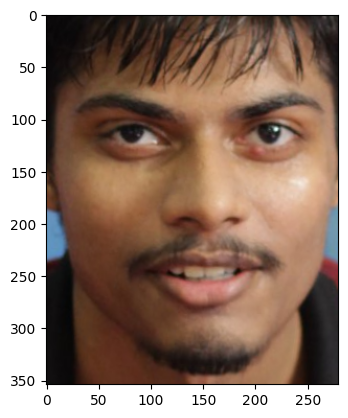

In [6]:
x, y, w, h = detections[0]['box']
x = centre[0] - int(w/2)
y = centre[1] - int(h/2)

plt.imshow(rotate[y:y+h, x:x+w])

In [7]:
help(cv2)

Help on package cv2:

NAME
    cv2 - OpenCV Python binary extension loader

PACKAGE CONTENTS
    config
    config-3
    cv2
    data (package)
    gapi (package)
    load_config_py2
    load_config_py3
    mat_wrapper (package)
    misc (package)
    typing (package)
    utils (package)
    version

SUBMODULES
    Error
    aruco
    barcode
    cuda
    detail
    dnn
    fisheye
    flann
    ipp
    ml
    ocl
    ogl
    parallel
    samples
    segmentation
    videoio_registry

DATA
    __all__ = []

VERSION
    4.8.1

FILE
    /Users/arpitsharma/miniconda3/envs/active-speaker/lib/python3.9/site-packages/cv2/__init__.py


